## Relação de mulheres formadas


In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [51]:
# Leitura do dataset "relacao-diplomados"

df_rel_diplomados = pd.read_csv('relacao-diplomados.csv')
df_rel_diplomados = df_rel_diplomados[['SEXO', 'CURSO']]
cols = df_rel_diplomados.columns # Guardo as colunas para usá-las nos demais datasets (Padronização)
df_rel_diplomados.tail()

,SEXO,CURSO
1026,M,Engenharia Sanitária e Ambiental
1027,M,Engenharia Sanitária e Ambiental
1028,M,Engenharia Civil
1029,F,Geologia
1030,M,Mestrado Profissional em Matemática


In [52]:
# Leitura dos datasets "2019", "2020" e "2021"

df_dipl_2019 = pd.read_csv('2019.csv')
df_dipl_2020 = pd.read_csv('2020.csv')
df_dipl_2021 = pd.read_csv('2021.csv')
df_dipl_2020.columns = df_dipl_2019.columns # Necessário pois o dataset '2020' estava sem cabeçalhos/nome_colunas
df_dipl_ano = df_dipl_2019.append(df_dipl_2020, ignore_index=True) # O dataset df_dipl é a união dos demais (2019, 2020 e 2021)
df_dipl_ano = df_dipl_ano.append(df_dipl_2021, ignore_index=True)
df_dipl_ano = df_dipl_ano[['SEXO', 'NOME_CURSO']]
df_dipl_ano.columns = cols # Padronização dos nomes das colunas
df_dipl_ano.tail()

,SEXO,CURSO
7099,M,SEGURANÇA PÚBLICA
7100,M,SEGURANÇA PÚBLICA
7101,M,SEGURANÇA PÚBLICA
7102,M,SEGURANÇA PÚBLICA
7103,F,QUÍMICA


In [53]:
# Leitura do dataset "diplomados_graduacao"

df_dipl_graduacao = pd.read_csv('diplomados_graduacao.csv')
df_dipl_graduacao = df_dipl_graduacao[['SEXO', 'NOME_CURSO_DIPLOMA']]
df_dipl_graduacao.columns = cols
df_dipl_graduacao.tail()

,SEXO,CURSO
2886,F,Medicina
2887,F,Toxicologia Analítica
2888,F,Medicina
2889,F,Medicina
2890,F,Medicina


In [54]:
# Separação do tipo da modalidade de curso 

df_dipl_graduacao = pd.read_csv('diplomados_graduacao.csv')
df_modalidade_curso = df_dipl_graduacao[['SEXO', 'NOME_CURSO_DIPLOMA', 'MODALIDADE']]

df_modalidade_curso.tail()

,SEXO,NOME_CURSO_DIPLOMA,MODALIDADE
2886,F,Medicina,Bacharelado
2887,F,Toxicologia Analítica,Tecnológico
2888,F,Medicina,Bacharelado
2889,F,Medicina,Bacharelado
2890,F,Medicina,Bacharelado


In [55]:
# Leitura do dataset "diplomas-20-maio-2021", "diplomas-jun-2021.csv" e ""diplomas_jul_2021.csv

df_dipl_maio_2021 = pd.read_csv( 'diplomas-20-maio-2021.csv' )
df_dipl_junho_2021 = pd.read_csv( 'diplomas-jun-2021.csv' )
df_dipl_julho_2021 = pd.read_csv( 'diplomas_jul_2021.csv' )
df_dipl_mes = df_dipl_maio_2021.append(df_dipl_junho_2021, ignore_index=True)
df_dipl_mes = df_dipl_mes.append(df_dipl_julho_2021, ignore_index=True)
df_dipl_mes = df_dipl_mes[['SEXO', 'NOME_CURSO']]
df_dipl_mes.tail()

,SEXO,NOME_CURSO
6453,F,CIÊNCIAS ECONÔMICAS
6454,M,SISTEMAS DE INFORMAÇÃO
6455,F,MEDICINA VETERINÁRIA
6456,F,ENFERMAGEM
6457,M,FÍSICA


In [56]:
# DataFrame "data"
# É a união de todos os datasets.

data = df_rel_diplomados.append(df_dipl_ano, ignore_index=True)
data = data.append(df_dipl_graduacao, ignore_index=True)
data.tail()

,SEXO,CURSO,NOME_PESSOA,NOME_CURSO_DIPLOMA,MODALIDADE,FORMA_INGRESSO,ANO_INGRESSO,ANO_EVASAO
11021,F,NaN,MAYARA CHRIST MACHRY,Medicina,Bacharelado,ENEM/SISU,2010.0,2016.0
11022,F,NaN,Giovanna Cristiano de Gouveia,Toxicologia Analítica,Tecnológico,ENEM/SISU,2018.0,2021.0
11023,F,NaN,Lenita Pereira Ferraz,Medicina,Bacharelado,ENEM/SISU,2010.0,2016.0
11024,F,NaN,NATASHA KISSMANN,Medicina,Bacharelado,ENEM/SISU,2011.0,2016.0
11025,F,NaN,Beatriz Rosa Garcia,Medicina,Bacharelado,Transferência amparada em lei,2020.0,2021.0


In [57]:
# Conta o número de estudantes por sexo
by_sexo = data.groupby('SEXO').count().reset_index()
by_sexo

# groupby - Agrupa os dados pela coluna passada no parâmetro
# count() - Conta o número de itens de cada grupo encontrado pelo groupby
# reset_index() - Reorganiza os índices para a nova estrutura do DataFrame

,SEXO,CURSO,NOME_PESSOA,NOME_CURSO_DIPLOMA,MODALIDADE,FORMA_INGRESSO,ANO_INGRESSO,ANO_EVASAO
0,F,4470,2026,2026,2026,2026,2026,2026
1,M,3665,865,865,865,865,865,865


No handles with labels found to put in legend.


0    F
1    M
Name: SEXO, dtype: object
0    4470
1    3665
Name: CURSO, dtype: int64


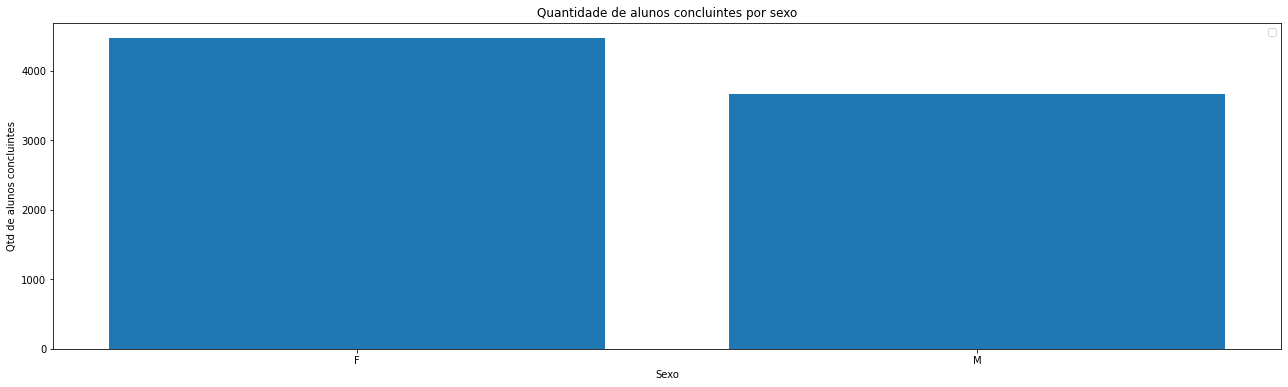

In [58]:
# Numero de formandos por sexo

print(by_sexo['SEXO'])
print(by_sexo['CURSO'])

plt.figure( figsize=(22,6) ) # Tamanho da figura
plt.bar( by_sexo['SEXO'], by_sexo['CURSO'] ) # valores dos eixos x e y
plt.xlabel('Sexo')
plt.ylabel('Qtd de alunos concluintes')
plt.title('Quantidade de alunos concluintes por sexo')
plt.legend()

    MODALIDADE  SEXO  NOME_CURSO_DIPLOMA
0  Bacharelado  1919                1919
1  Tecnológico   107                 107
    MODALIDADE  SEXO  NOME_CURSO_DIPLOMA
0  Bacharelado   817                 817
1  Tecnológico    48                  48


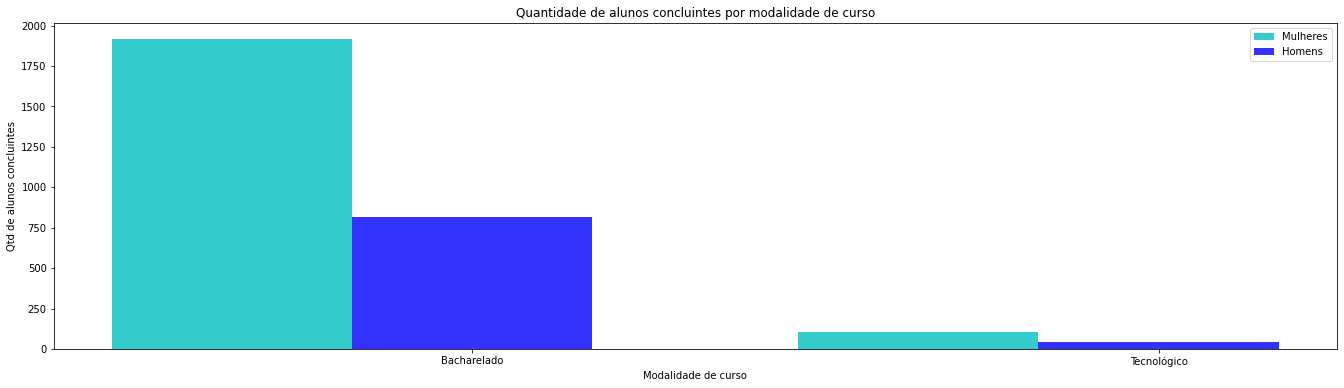

In [64]:
# Grafico de mulheres por modalidade de curso

#Colocar masculino

modalidade_F = df_modalidade_curso.loc[df_modalidade_curso['SEXO'] == 'F'].groupby('MODALIDADE').count().reset_index()
modalidade_M = df_modalidade_curso.loc[df_modalidade_curso['SEXO'] == 'M'].groupby('MODALIDADE').count().reset_index()

print(modalidade_F)
print(modalidade_M)

# data to plot
n_groups = 2

# create plot
fig = plt.subplots(figsize=(23,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, modalidade_F['SEXO'], bar_width,
alpha=opacity,
color='c',
label='Mulheres')

rects2 = plt.bar(index + bar_width, modalidade_M['SEXO'], bar_width,
alpha=opacity,
color='b',
label='Homens')

plt.xlabel('Modalidade de curso')
plt.ylabel('Qtd de alunos concluintes')
plt.title('Quantidade de alunos concluintes por modalidade de curso')
plt.xticks(index + bar_width, (modalidade_M['MODALIDADE']))
plt.legend()

plt.show()


In [60]:
# Gráfico: Cursos em ordenador por maior diferença entre F e M

by_curso_F = data.loc[data['SEXO'] == 'F'].groupby('CURSO').count()
by_curso_M = data.loc[data['SEXO'] == 'M'].groupby('CURSO').count()
by_curso_F = by_curso_F / by_curso_F.max() # Divide pelo máximo (Normaliza os valores entre 0 e 1)
by_curso_M = by_curso_M / by_curso_M.max() # Divide pelo máximo (Normaliza os valores entre 0 e 1)

# loc - Localiza os itens que atendam a condição
# groupby - Agrupa por curso os itens selecionados pelo "loc"

No handles with labels found to put in legend.


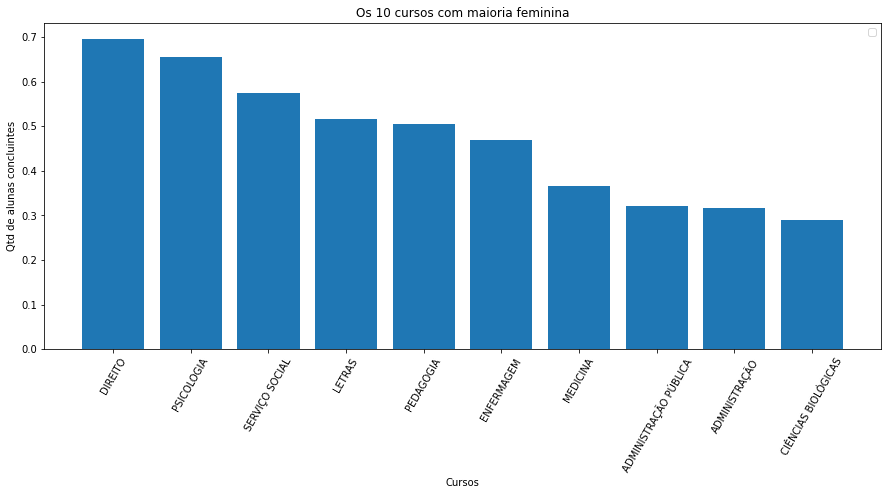

In [61]:
# Gráfico: Os 10 cursos com maioria F

by_curso = (by_curso_F - by_curso_M).sort_values( 'SEXO', ascending=False ).reset_index() # Ordena pela maior diferença entre o número de F e M

plt.figure( figsize=(15,6) )
plt.bar( by_curso['CURSO'][:10],  by_curso['SEXO'][:10])
plt.xticks( rotation=60 );
plt.xlabel('Cursos')
plt.ylabel('Qtd de alunas concluintes')
plt.title('Os 10 cursos com maioria feminina')
plt.legend()

No handles with labels found to put in legend.


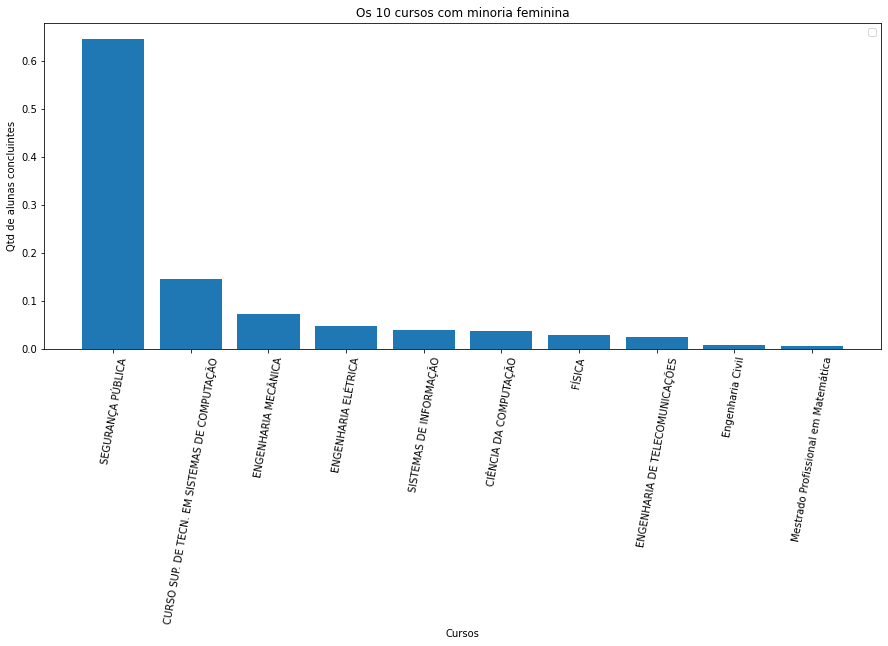

In [62]:
# Gráfico: Os 10 cursos com minoria F

by_curso = (by_curso_M - by_curso_F).sort_values( 'SEXO', ascending=False ).reset_index() # Ordena pela maior diferença entre o número de M e F
plt.figure( figsize=(15,6) )
plt.bar( by_curso['CURSO'][:10],  by_curso['SEXO'][:10])
plt.xticks( rotation=80 );
plt.xlabel('Cursos')
plt.ylabel('Qtd de alunas concluintes')
plt.title('Os 10 cursos com minoria feminina')
plt.legend()